# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *K*

**Names:**

* *Robin Lang*
* *Kim Lan Phan Hoang*
* *Julien Harbulot*

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

In [1]:
import epidemics_helper
import json

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx
from networkx.readwrite import json_graph

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [2]:
file = open("../data/nyc_augmented_network.json")
file_json = json.load(file)
G = json_graph.node_link_graph(file_json)

sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
sir.launch_epidemic(source=23654, max_time=100.0)

num_nodes = nx.number_of_nodes(G)
inf = sir.inf_time
rec = sir.rec_time

Epidemic stopped after 100.08 days | 100.08 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


In [3]:
def SIR(t):
    I = 0
    S = 0
    R = 0
    
    for i in range(num_nodes):
        if inf[i] < t:
            I += 1
        else:
            S += 1
        
        if rec[i] < t:
            I -= 1
            R += 1
    return (S, I, R)

In [4]:
graph_points = 500

X = np.arange(0, 100, 100/graph_points)
INF = np.zeros(graph_points)
SUSC = np.zeros(graph_points)
REC = np.zeros(graph_points)
for i in range(graph_points):
    curr = SIR(X[i])
    
    SUSC[i] = curr[0]
    INF[i] = curr[1]
    REC[i] = curr[2]

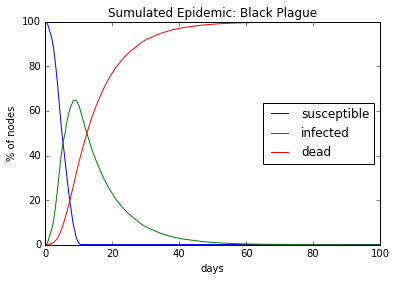

In [5]:
plt.plot(X, SUSC/num_nodes*100, label="susceptible")
plt.plot(X, INF/num_nodes*100, label="infected")
plt.plot(X, REC/num_nodes*100, label="dead")
plt.legend(loc='center right', frameon=True)
plt.xlabel("days")
plt.ylabel("% of nodes")
plt.title("Sumulated Epidemic: Black Plague")
plt.show()

In [6]:
def find_min_infected(p):
    index = 0
    while (index < graph_points-1) & (INF[index]/num_nodes < p/100):
        index += 1

    if (INF[index]/num_nodes < p/100):
        print(p, "% are never infected")
    else:
        print(p, "% are infected after", index*100/graph_points, "days")

def find_min_dead(p):
    index = 0
    while (index < graph_points-1) & (REC[index]/num_nodes < p/100):
        index += 1

    if (REC[index]/num_nodes < p/100):
        print(p, "% are never dead")
    else:
        print(p, "% are dead after", index*100/graph_points, "days")

In [7]:
find_min_infected(60)
find_min_dead(60)

60 % are infected after 7.2 days
60 % are dead after 14.8 days


In [ ]:
# Get the position of the nodes
pos = nx.spring_layout(G) # positions for all nodes

    # Initialize data structures
susceptible = []
infected = []
recovered = []

    # Collect the labels and assign the nodes to clubs
for n in range(50):
    if (inf[n] > d):
        susceptible.append(n)
    elif (rec[n] < d):
        recovered.append(n)
    else:
        infected.append(n)

    # Draw the network
nx.draw_networkx_nodes(G, pos, nodelist=susceptible, node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=infected, node_color='g')
nx.draw_networkx_nodes(G, pos, nodelist=recovered, node_color='r')
nx.draw_networkx_edges(G, pos)
plt.axis('off');

In [ ]:
def draw_SIR(d):
    print("after", d, "days:")
        
    # Get the position of the nodes
    pos = nx.spring_layout(G) # positions for all nodes

    # Initialize data structures
    susceptible = []
    infected = []
    recovered = []

    # Collect the labels and assign the nodes to clubs
    for n in G.nodes():
        if (inf[n] > d):
            susceptible.append(n)
        elif (rec[n] < d):
            recovered.append(n)
        else:
            infected.append(n)

    # Draw the network
    nx.draw_networkx_nodes(G, pos, nodelist=susceptible, node_color='b')
    nx.draw_networkx_nodes(G, pos, nodelist=infected, node_color='g')
    nx.draw_networkx_nodes(G, pos, nodelist=recovered, node_color='r')
    nx.draw_networkx_edges(G, pos)
    plt.axis('off');


In [ ]:
draw_SIR(3)

after 3 days:


---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

In [ ]:
"""
sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
sir.launch_epidemic(source=23654, max_time=15.0)
"""

"""It needs about 7 days to get 60% of the population infected (it is a very fast illness!).
It needs about 15 days to get 60% of the population recovered (healed or dead).
"""

nG = nx.Graph()
links = file_json['links']
nodes =file_json['nodes']
pos = np.zeros((num_nodes, 2))

for i in range(1000):
    u = links[i]['target']
    v = links[i]['source']
    
    coordU = nodes[u]['coordinates']
    coordV = nodes[v]['coordinates']
    nG.add_node(u, pos=(coordU[0], coordU[1]))
    nG.add_node(v, pos=(coordV[0], coordV[1]))
    nG.add_edge(u,v)  # default edge data=1
    pos[i] =((coordU[0], coordU[1]))
    pos[num_nodes-i-1] = ((coordU[0], coordU[1]))

nx.draw(nG, pos)
plt.show()

#### Exercise 2.11: Strategy 2